In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

In [2]:
from google.colab import drive
drive.mount('/content/gdriv')

Mounted at /content/gdriv


In [3]:
import os
file_path = '/content/gdriv/MyDrive/산데과'
file_list = os.listdir(file_path)
stock = pd.read_csv(file_path+'/'+file_list[4],encoding = 'euc-kr')
stock.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,삼성전자,52500,52600,51600,52100,52900,53300,52700,52300,51200,50400,50400,51100,51300,50900,50700,51200,51200,50300,49900,50500,50700,50100,50000,49150,48550,48900,47750,48000,47600,48850,49050,48400,49200,48900,49500,49300,49200,49150,47700,...,43700,43000,43700,43150,42650,43200,43500,43950,44950,45200,45350,46550,46100,47150,47200,46400,47300,47200,46800,46100,46050,46850,46450,46300,46200,45550,45100,44400,45650,46000,45400,46250,46600,47000,46500,45700,45600,45500,45700,45500
1,삼성SDI,234500,233000,234000,237500,232000,232000,235000,233000,231000,227500,230000,228000,229500,226000,226000,224500,224500,224500,224000,220000,218500,220000,226500,227000,232500,226500,219500,218500,220500,225500,223000,222500,224500,223000,238500,237000,237000,236500,234500,...,255500,245500,249500,247500,236000,235500,236000,243000,251500,248500,249000,237000,229000,232000,233000,239000,242500,241500,242000,242000,241000,241000,239000,238000,231000,231500,227500,234000,238500,239000,233000,234500,238000,236500,237500,229000,229000,229500,233000,237500
2,SKC,45200,45400,47150,46050,44100,44700,46000,47100,44750,44350,44150,44250,44800,41100,42000,41600,42050,41700,42150,41900,41750,41200,41700,40600,40250,41000,40800,39400,39700,39900,39800,39350,39500,39850,42500,42250,44050,43200,43650,...,40900,40150,41000,42850,43850,42500,41000,41800,42250,41750,42300,40900,41300,41650,41800,43400,44100,43000,43600,44000,42850,42950,43200,41750,40650,40300,39350,38000,38350,39150,38550,38400,39100,39600,36800,36300,36900,35500,35500,36650
3,현대백화점,78500,75600,76400,77400,78200,78300,75400,75700,73500,73900,74600,75800,76000,76000,76100,77000,77600,78600,79100,76300,77300,75500,76000,75700,74700,76500,75200,75000,75800,77600,78100,76500,77400,78900,78000,78200,79000,78700,78900,...,70100,70500,70000,70900,71100,69300,70400,71100,72900,74100,74100,75300,74800,75800,77000,77700,79400,78700,78700,78000,79300,80400,79300,81300,79600,78800,79000,79400,80900,80800,80700,82100,83200,82700,83400,82600,83800,83700,84100,84800
4,한전KPS,32950,33500,33700,33600,33700,33350,33600,33750,32750,32600,33150,33500,33850,33750,33650,33200,33850,33600,33400,33300,33200,33200,33200,32700,32450,34050,34300,34000,34350,34750,34550,33900,34500,34100,34650,34650,34400,34000,34000,...,30850,30950,31300,30800,30600,30500,30600,30800,31100,31500,31900,31150,31100,31200,31250,31700,31950,31100,31200,30450,30700,30600,30650,31200,31100,30550,30550,31200,32250,31450,31500,31000,31250,31250,31650,31350,31300,32900,32400,33000


In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import minmax_scale

In [5]:
names = stock.iloc[:,0]
train = stock.iloc[:,1:]
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,52500,52600,51600,52100,52900,53300,52700,52300,51200,50400,50400,51100,51300,50900,50700,51200,51200,50300,49900,50500,50700,50100,50000,49150,48550,48900,47750,48000,47600,48850,49050,48400,49200,48900,49500,49300,49200,49150,47700,46900,...,43700,43000,43700,43150,42650,43200,43500,43950,44950,45200,45350,46550,46100,47150,47200,46400,47300,47200,46800,46100,46050,46850,46450,46300,46200,45550,45100,44400,45650,46000,45400,46250,46600,47000,46500,45700,45600,45500,45700,45500
1,234500,233000,234000,237500,232000,232000,235000,233000,231000,227500,230000,228000,229500,226000,226000,224500,224500,224500,224000,220000,218500,220000,226500,227000,232500,226500,219500,218500,220500,225500,223000,222500,224500,223000,238500,237000,237000,236500,234500,234500,...,255500,245500,249500,247500,236000,235500,236000,243000,251500,248500,249000,237000,229000,232000,233000,239000,242500,241500,242000,242000,241000,241000,239000,238000,231000,231500,227500,234000,238500,239000,233000,234500,238000,236500,237500,229000,229000,229500,233000,237500
2,45200,45400,47150,46050,44100,44700,46000,47100,44750,44350,44150,44250,44800,41100,42000,41600,42050,41700,42150,41900,41750,41200,41700,40600,40250,41000,40800,39400,39700,39900,39800,39350,39500,39850,42500,42250,44050,43200,43650,43300,...,40900,40150,41000,42850,43850,42500,41000,41800,42250,41750,42300,40900,41300,41650,41800,43400,44100,43000,43600,44000,42850,42950,43200,41750,40650,40300,39350,38000,38350,39150,38550,38400,39100,39600,36800,36300,36900,35500,35500,36650
3,78500,75600,76400,77400,78200,78300,75400,75700,73500,73900,74600,75800,76000,76000,76100,77000,77600,78600,79100,76300,77300,75500,76000,75700,74700,76500,75200,75000,75800,77600,78100,76500,77400,78900,78000,78200,79000,78700,78900,79200,...,70100,70500,70000,70900,71100,69300,70400,71100,72900,74100,74100,75300,74800,75800,77000,77700,79400,78700,78700,78000,79300,80400,79300,81300,79600,78800,79000,79400,80900,80800,80700,82100,83200,82700,83400,82600,83800,83700,84100,84800
4,32950,33500,33700,33600,33700,33350,33600,33750,32750,32600,33150,33500,33850,33750,33650,33200,33850,33600,33400,33300,33200,33200,33200,32700,32450,34050,34300,34000,34350,34750,34550,33900,34500,34100,34650,34650,34400,34000,34000,33500,...,30850,30950,31300,30800,30600,30500,30600,30800,31100,31500,31900,31150,31100,31200,31250,31700,31950,31100,31200,30450,30700,30600,30650,31200,31100,30550,30550,31200,32250,31450,31500,31000,31250,31250,31650,31350,31300,32900,32400,33000


In [6]:
scaled_train = minmax_scale(train,axis=1,copy=True)
scaled_train

array([[0.92488263, 0.9342723 , 0.84037559, ..., 0.26760563, 0.28638498,
        0.26760563],
       [0.43243243, 0.39189189, 0.41891892, ..., 0.2972973 , 0.39189189,
        0.51351351],
       [0.83261803, 0.84978541, 1.        , ..., 0.        , 0.        ,
        0.09871245],
       ...,
       [0.62566845, 0.6684492 , 0.77540107, ..., 0.16042781, 0.22459893,
        0.2459893 ],
       [0.61818182, 0.76363636, 0.67272727, ..., 0.32727273, 0.38181818,
        0.34545455],
       [0.66666667, 0.78070175, 0.71052632, ..., 0.89473684, 0.8245614 ,
        0.81578947]])

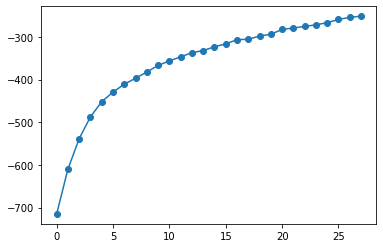

In [7]:
score = []
for i in range(2,30):
  model = KMeans(n_clusters=i)
  res = model.fit(scaled_train)
  score.append(res.score(scaled_train))

plt.plot(score,marker='o')

In [8]:
#n_cluster = 8 정도
#위의 그래프를 보면 7,8정도에서 기울기가 일정해 지는 것이 보인다.
#그렇기에 더 이상 군집을 증가해서 얻는 score 이득은 없다고 판단

model=KMeans(n_clusters=8)
res=model.fit(scaled_train)

In [9]:
res_data = pd.concat([pd.DataFrame(res.labels_),pd.DataFrame(scaled_train)],axis=1)
res_data.head()

,0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,1,0.924883,0.934272,0.840376,0.887324,0.962441,1.000000,0.943662,0.906103,0.802817,0.727700,0.727700,0.793427,0.812207,0.774648,0.755869,0.802817,0.802817,0.718310,0.680751,0.737089,0.755869,0.699531,0.690141,0.610329,0.553991,0.586854,0.478873,0.502347,0.464789,0.582160,0.600939,0.539906,0.615023,0.586854,0.643192,0.624413,0.615023,0.610329,0.474178,...,0.098592,0.032864,0.098592,0.046948,0.000000,0.051643,0.079812,0.122066,0.215962,0.239437,0.253521,0.366197,0.323944,0.422535,0.427230,0.352113,0.436620,0.427230,0.389671,0.323944,0.319249,0.394366,0.356808,0.342723,0.333333,0.272300,0.230047,0.164319,0.281690,0.314554,0.258216,0.338028,0.370892,0.408451,0.361502,0.286385,0.276995,0.267606,0.286385,0.267606
1,7,0.432432,0.391892,0.418919,0.513514,0.364865,0.364865,0.445946,0.391892,0.337838,0.243243,0.310811,0.256757,0.297297,0.202703,0.202703,0.162162,0.162162,0.162162,0.148649,0.040541,0.000000,0.040541,0.216216,0.229730,0.378378,0.216216,0.027027,0.000000,0.054054,0.189189,0.121622,0.108108,0.162162,0.121622,0.540541,0.500000,0.500000,0.486486,0.432432,...,1.000000,0.729730,0.837838,0.783784,0.472973,0.459459,0.472973,0.662162,0.891892,0.810811,0.824324,0.500000,0.283784,0.364865,0.391892,0.554054,0.648649,0.621622,0.635135,0.635135,0.608108,0.608108,0.554054,0.527027,0.337838,0.351351,0.243243,0.418919,0.540541,0.554054,0.391892,0.432432,0.527027,0.486486,0.513514,0.283784,0.283784,0.297297,0.391892,0.513514
2,4,0.832618,0.849785,1.000000,0.905579,0.738197,0.789700,0.901288,0.995708,0.793991,0.759657,0.742489,0.751073,0.798283,0.480687,0.557940,0.523605,0.562232,0.532189,0.570815,0.549356,0.536481,0.489270,0.532189,0.437768,0.407725,0.472103,0.454936,0.334764,0.360515,0.377682,0.369099,0.330472,0.343348,0.373391,0.600858,0.579399,0.733906,0.660944,0.699571,...,0.463519,0.399142,0.472103,0.630901,0.716738,0.600858,0.472103,0.540773,0.579399,0.536481,0.583691,0.463519,0.497854,0.527897,0.540773,0.678112,0.738197,0.643777,0.695279,0.729614,0.630901,0.639485,0.660944,0.536481,0.442060,0.412017,0.330472,0.214592,0.244635,0.313305,0.261803,0.248927,0.309013,0.351931,0.111588,0.068670,0.120172,0.000000,0.000000,0.098712
3,3,0.608696,0.428571,0.478261,0.540373,0.590062,0.596273,0.416149,0.434783,0.298137,0.322981,0.366460,0.440994,0.453416,0.453416,0.459627,0.515528,0.552795,0.614907,0.645963,0.472050,0.534161,0.422360,0.453416,0.434783,0.372671,0.484472,0.403727,0.391304,0.440994,0.552795,0.583851,0.484472,0.540373,0.633540,0.577640,0.590062,0.639752,0.621118,0.633540,...,0.086957,0.111801,0.080745,0.136646,0.149068,0.037267,0.105590,0.149068,0.260870,0.335404,0.335404,0.409938,0.378882,0.440994,0.515528,0.559006,0.664596,0.621118,0.621118,0.577640,0.658385,0.726708,0.658385,0.782609,0.677019,0.627329,0.639752,0.664596,0.757764,0.751553,0.745342,0.832298,0.900621,0.869565,0.913043,0.863354,0.937888,0.931677,0.956522,1.000000
4,1,0.581395,0.709302,0.755814,0.732558,0.755814,0.674419,0.732558,0.767442,0.534884,0.500000,0.627907,0.709302,0.790698,0.767442,0.744186,0.639535,0.790698,0.732558,0.686047,0.662791,0.639535,0.639535,0.639535,0.523256,0.465116,0.837209,0.895349,0.825581,0.906977,1.000000,0.953488,0.802326,0.941860,0.848837,0.976744,0.976744,0.918605,0.825581,0.825581,...,0.093023,0.116279,0.197674,0.081395,0.034884,0.011628,0.034884,0.081395,0.151163,0.244186,0.337209,0.162791,0.151163,0.174419,0.186047,0.290698,0.348837,0.151163,0.174419,0.000000,0.058140,0.034884,0.046512,0.174419,0.151163,0.023256,0.023256,0.174419,0.418605,0.232558,0.244186,0.127907,0.186047,0.186047,0.279070,0.209302,0.197674,0.569767,0.453488,0.593023


In [11]:
res.labels_

array([1, 7, 4, 3, 1, 4, 3, 2, 1, 3, 3, 6, 4, 2, 6, 3, 1, 3, 2, 4, 4, 3,
       3, 2, 3, 7, 6, 0, 3, 1, 3, 0, 5, 2, 4, 2, 2, 1, 5, 2, 2, 2, 1, 0,
       1, 2, 3, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 6, 3, 6, 0, 3, 0, 7, 1, 7,
       6, 3, 5, 3, 2, 3, 2, 1, 2, 6, 2, 3, 0, 2, 4, 7, 0, 2, 2, 3, 6, 2,
       6, 5, 2, 2, 5, 6, 5, 2, 2, 2, 3, 3, 1, 5, 0, 3, 2, 6, 2, 2, 2, 2,
       2, 4, 2, 7, 5, 4, 2, 1, 5, 2, 0, 6, 2, 1, 1, 4, 6, 3, 6, 3, 2, 2,
       3, 1, 4, 5, 1, 2, 1, 0, 2, 3, 2, 4, 6, 0, 0, 2, 6, 6, 7, 2, 6, 1,
       6, 6, 2, 1, 3, 0, 2, 0, 2, 0, 2, 5, 4, 6, 7, 3, 6, 2, 6, 2, 7, 1,
       0, 4, 3, 1, 2, 2, 2, 2, 3, 2, 2, 6, 3, 1, 2, 5, 6, 6, 6, 5, 3, 7,
       5, 3], dtype=int32)

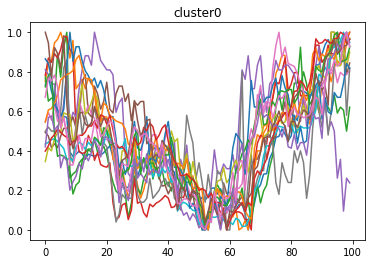

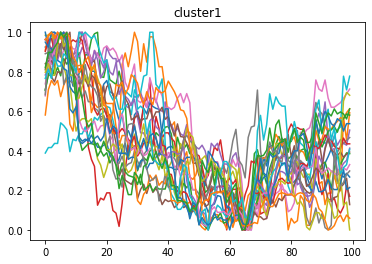

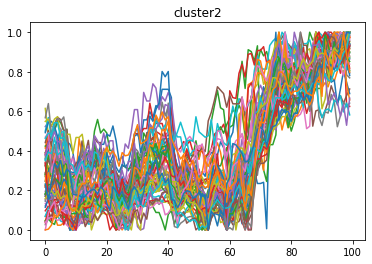

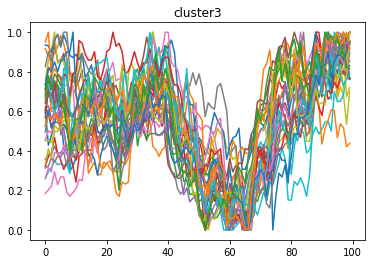

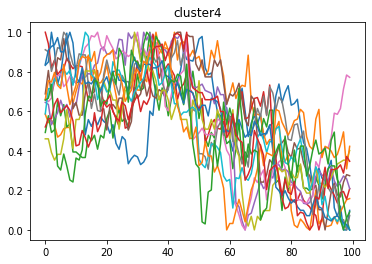

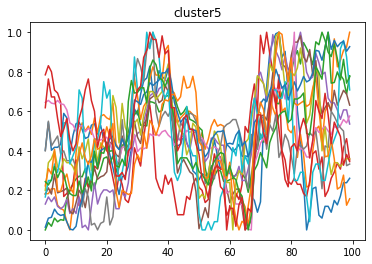

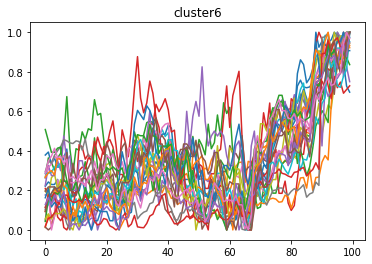

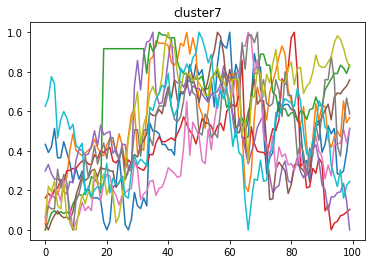

In [10]:
for i in range(8):
  temp = res_data[res_data.iloc[:,0]==i]
  temp_res = temp.iloc[:,1:]
  for j in range(len(temp_res)):
    plt.plot(temp_res.iloc[j,:])
  plt.title("cluster"+str(i))
  plt.show()